In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.model_selection import train_test_split
#from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
df= pd.read_csv("D:\FirstUniv\DataSet\data_train.csv")

In [13]:
print("Shape of the data:", df.shape)

Shape of the data: (32950, 16)


In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [15]:
"Shape of the data:", df.shape

('Shape of the data:', (32950, 16))

In [16]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [17]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [18]:
df['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

Text(0.5, 1.0, 'Target Variable')

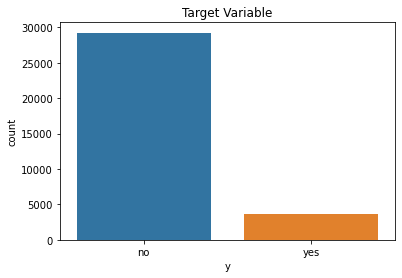

In [19]:
sns.countplot(df['y'])
plt.title("Target Variable")

In [20]:
df1=df['y'].value_counts()/len(df)*100
print(" Percentage of NO and Yes \n", df1)

 Percentage of NO and Yes 
 no     88.734446
yes    11.265554
Name: y, dtype: float64


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


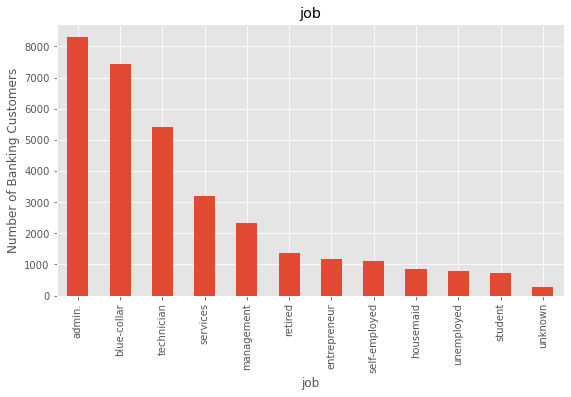

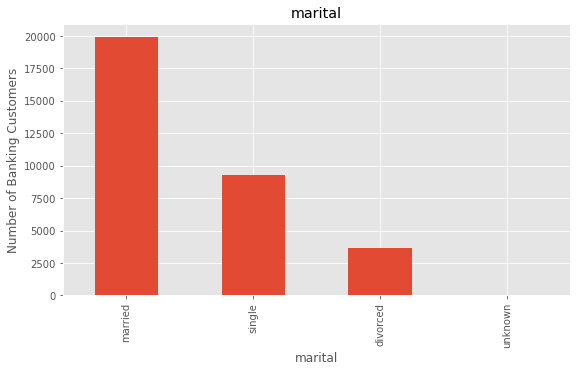

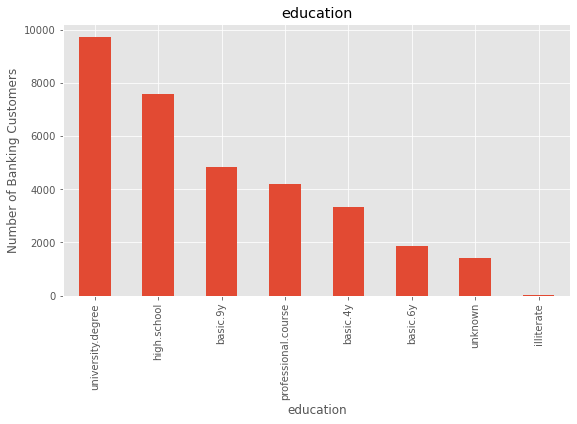

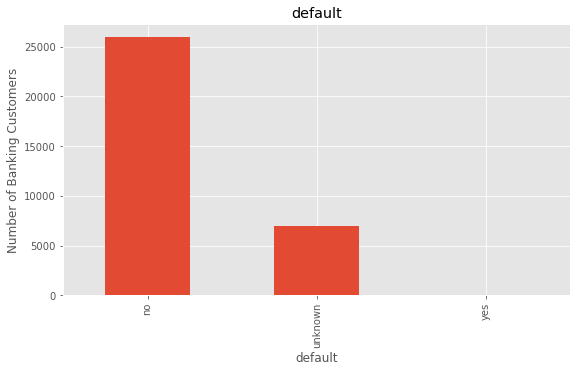

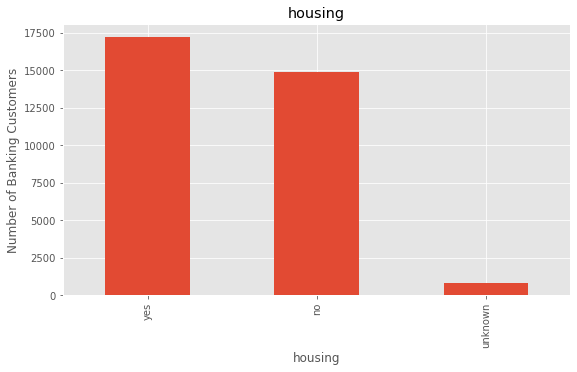

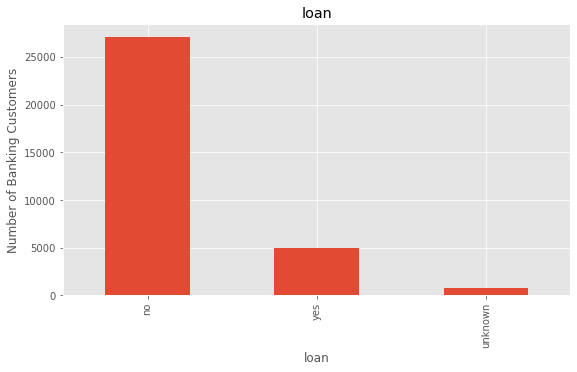

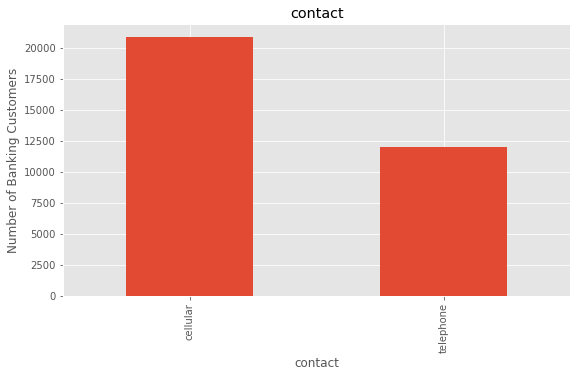

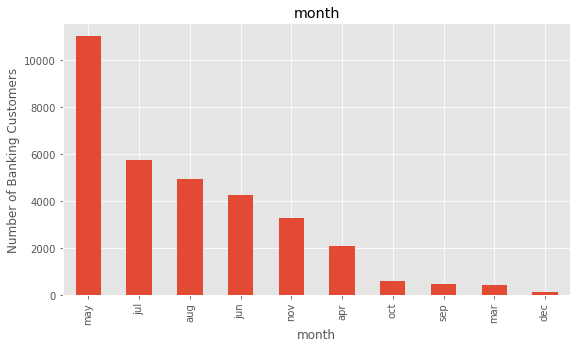

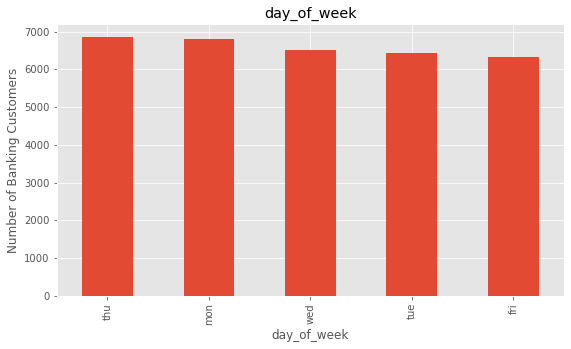

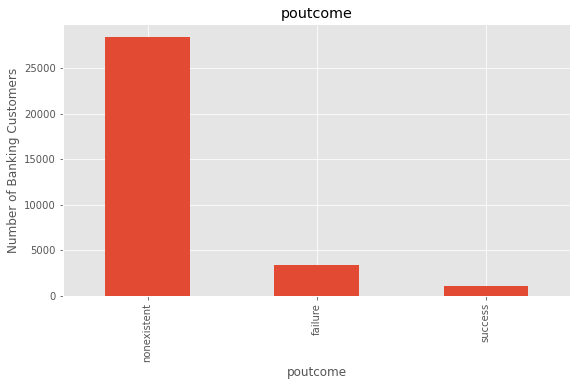

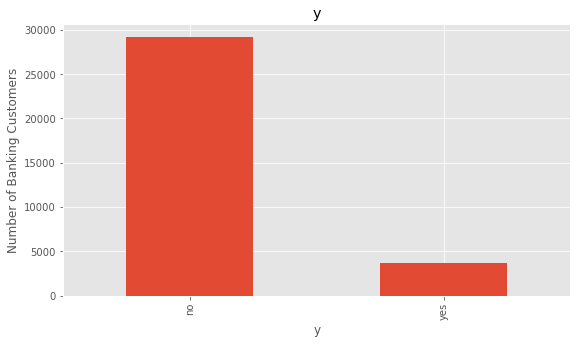

In [21]:
cat_v=df.select_dtypes(include=['object']).columns
print(cat_v)
plt.style.use('ggplot')

for column in cat_v:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel("Number of Banking Customers")
    plt.title(column)

In [22]:
for column in cat_v:
    mode=df[column].mode()[0]
    df[column]=df[column].replace('unknown',mode)

In [23]:
num_v=df.select_dtypes(include=np.number)
num_v.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


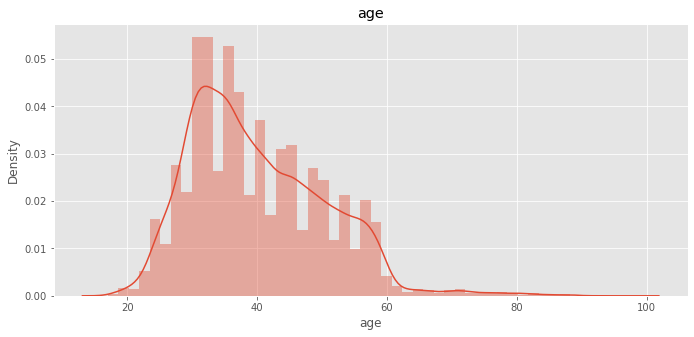

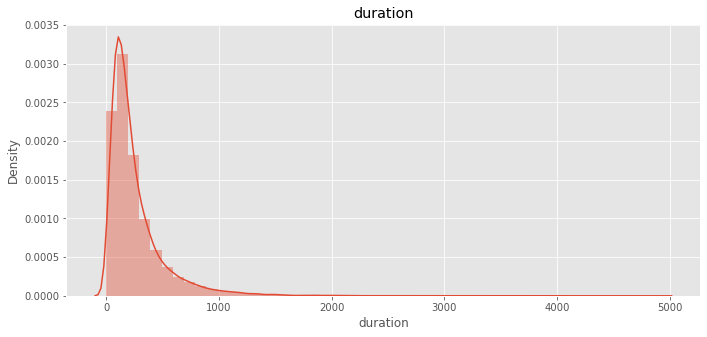

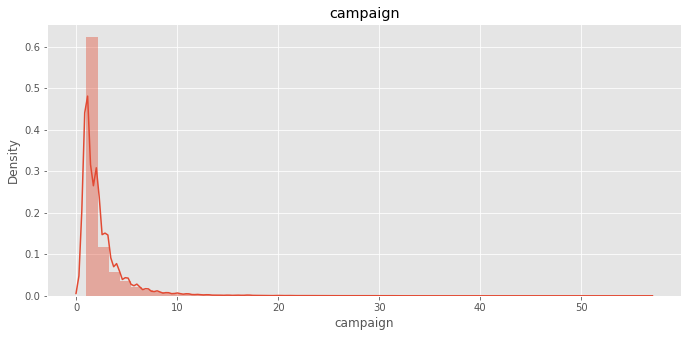

In [24]:
plt.style.use('ggplot')

for column in ['age','duration','campaign']:
    plt.figure(figsize=(25,5))
    plt.subplot(121)
    sns.distplot(df[column],kde=True)
    plt.title(column)
    

In [25]:
df.drop(columns=['pdays', 'previous'], axis=1,inplace=True)

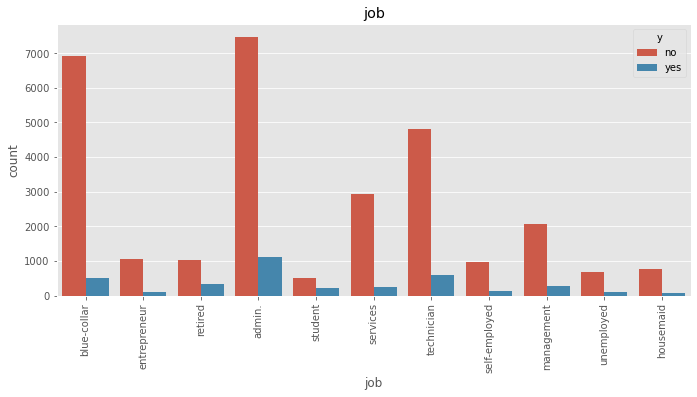

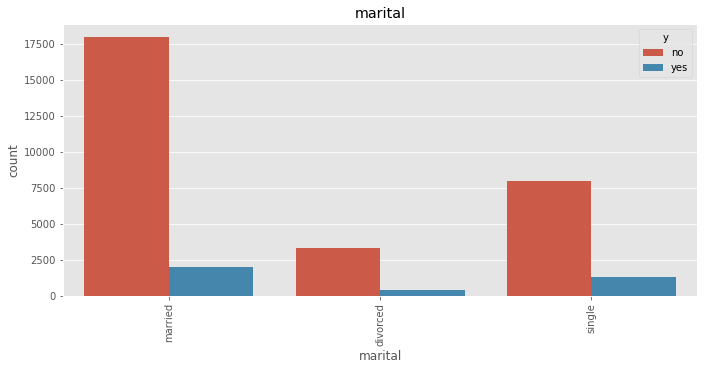

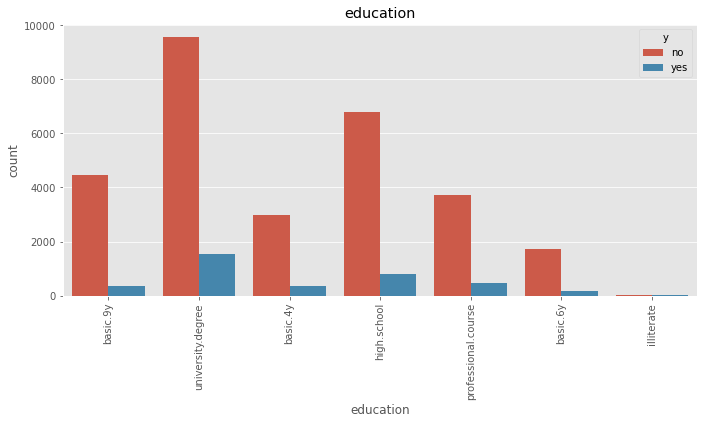

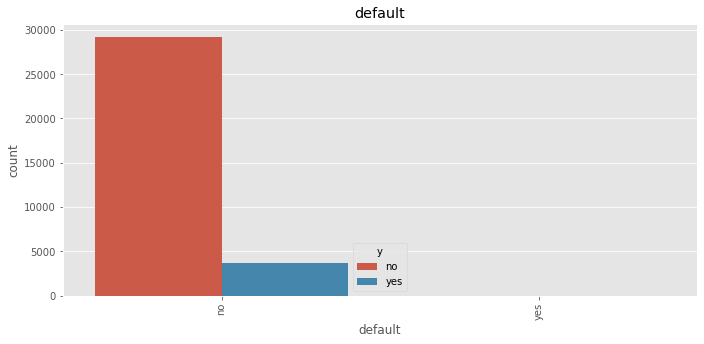

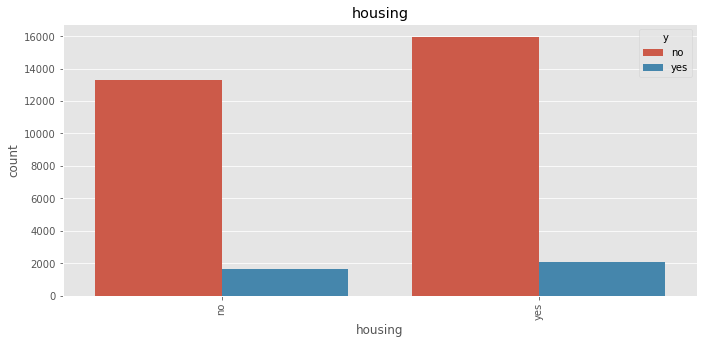

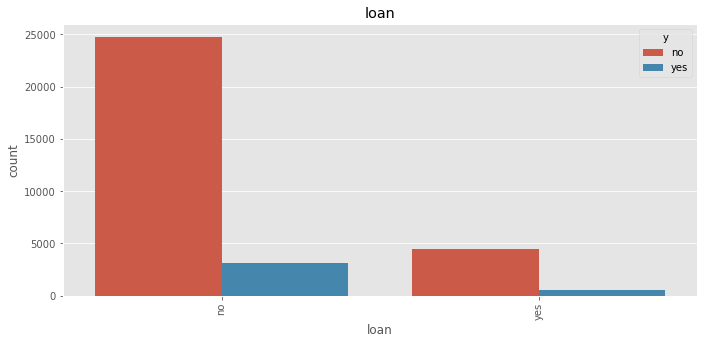

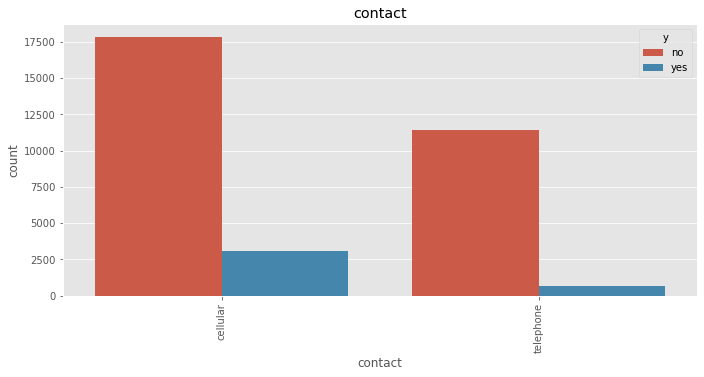

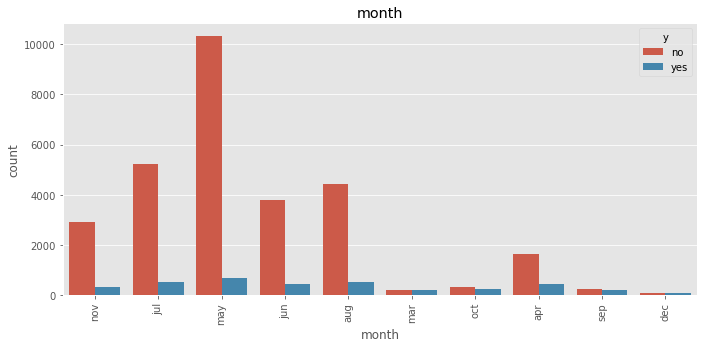

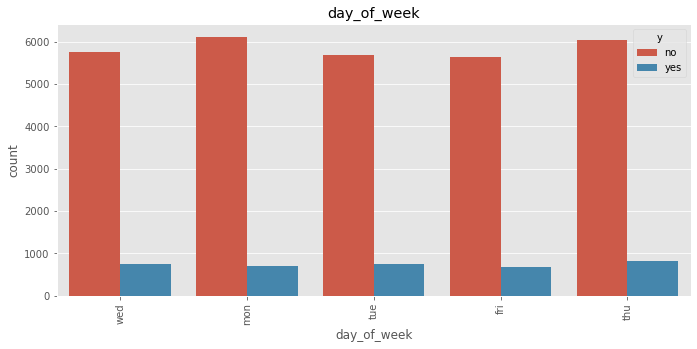

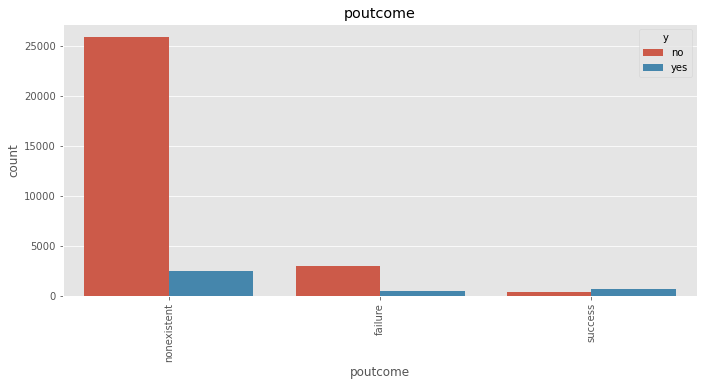

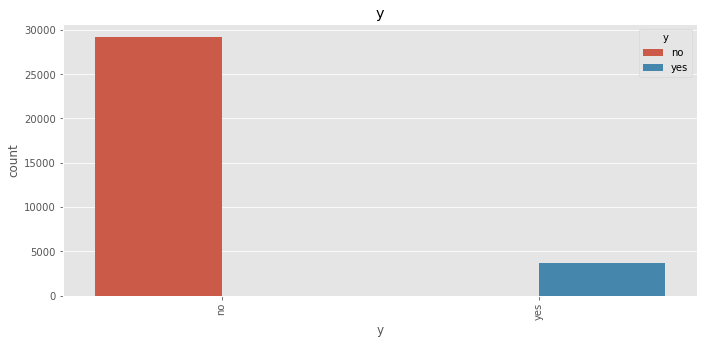

In [26]:
plt.style.use('ggplot')

for column in cat_v:
    plt.figure(figsize=(25,5))
    plt.subplot(121)
    sns.countplot(df[column],hue=df['y'])
    plt.title(column)
    plt.xticks(rotation=90)

In [27]:
df.describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607
std,10.403636,258.975917,2.752326
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


In [28]:
l_boundy=[]
u_boundy=[]

for i in ['age', 'duration', 'campaign']:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    l_bound=df[i].quantile(0.25)-(1.5*IQR)
    u_bound=df[i].quantile(0.75)+(1.5*IQR)
    print(i,":", l_bound,",", u_bound)
    l_boundy.append(l_bound)
    u_boundy.append(u_bound)
    

age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [29]:
l_boundy


[9.5, -221.0, -2.0]

In [30]:
u_boundy

[69.5, 643.0, 6.0]

In [31]:
j=0
for i in ['age', 'duration', 'campaign']:
    df.loc[df[i]>u_boundy[j], i]=int(u_boundy[j])
    j=j+1

In [32]:
df.describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,39.929894,234.923915,2.271077
std,10.118566,176.854558,1.546302
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,69.000000,643.000000,6.000000


In [33]:
cat_v

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [38]:
for i in cat_v:
    print(i, ":", df[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [43]:
'''le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_v:
    data[feature]=le.fit_transform(data[feature])'''

'le= LabelEncoder()\n\n# iterating through each categorical feature and label encoding them\nfor feature in cat_v:\n    data[feature]=le.fit_transform(data[feature])'

<AxesSubplot:>

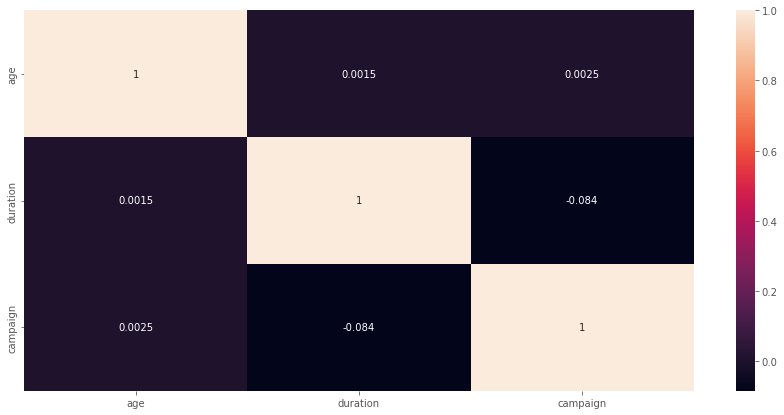

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

In [3]:
class Car:
    def __init__(self, S, D, T):
        self.S=S
        self.D=D
        self.T=T
    def dis(self):
        dict={'M':5,'d':5,'t':5}
        print(dict)
    def buy(self):
        dict1={'s':1,'d':0,'t':0}
        print(dict1)
        